### Постановка задачи 
##### Имеем набор данных:
 0. ID - Уникальный идентификатор пользователя
 1. Year_Birth - Customer's birth year
 2. Education - Education Qualification of customer
 3. Marital_Status - Marital Status of customer
 4. Income - Customer's yearly household income
 5. Kidhome - Number of children in customer's household
 6. Teenhome - Number of teenagers in customer's household
 7. Dt_Customer - Date of customer's enrollment with the company
 8. Recency - Number of days since customer's last purchase
 9. MntWines - Amount spent on wine in last 2 years
 10. MntFruits - Amount spent on fruits in last 2 years
 11. MntMeatProducts - Amount spent on meat in last 2 years
 12. MntFishProducts - Amount spent on fish in last 2 years
 13. MntSweetProducts - Amount spent on sweets in last 2 years
 14. MntGoldProds - Amount spent on gold? in last 2 years
 15. NumDealsPurchases - Number of purchases made with a discount
 16. NumWebPurchases - Amount of web purchases 
 17. NumCatalogPurchases - Amount of catalogue purchases
 18. NumStorePurchases - Amount of store purchases
 19. NumWebVisitsMonth - Amount of web visits last month
 20. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwis
 21. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwis
 22. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwis
 23. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 24. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwis
 25. Complain - 1 if customer complained in the last 2 years, 0 otherwise
 26. Z_CostContact
 27. Z_Revenue
 28. Response - 1 if customer accepted the offer in the last campaign, 0 otherwise

#####  По этим данным необходимо предсказать, стоит ли человеку рекламировать некоторый продукт.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
import sklearn  

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [4]:
data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Некоторые признаки являются нечисловыми: образование, семейное положение и дата первой покупки
Проведем небольшой препроцессинг - Kidhome и Teenhome заменим признаком Children.
Нечисловые признаки заменим числовыми

In [6]:
data['children'] = (data['Kidhome'] + data['Teenhome']) > 0
data = data.drop(columns=['Kidhome', 'Teenhome', 'Z_Revenue', 'Z_CostContact'])

In [7]:
data_describe = data.describe(include = [object])
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

##### Remove ID column

In [8]:
numerical_columns = numerical_columns[1:]

##### Remove Date column

In [9]:
nonbinary_columns = nonbinary_columns[0:-1]

In [10]:
data[nonbinary_columns]

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [11]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')


In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,4,7,0,0,0,0,0,0,1,False
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,2,5,0,0,0,0,0,0,0,True
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,...,10,4,0,0,0,0,0,0,0,False
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,...,4,6,0,0,0,0,0,0,0,True
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,6,5,0,0,0,0,0,0,0,True


In [13]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
children                0
dtype: int64

### Заполним пропуски в колонке Income

In [14]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [15]:
corrmat = data.corr()
corrmat

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children
ID,1.000000,0.000028,0.012996,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,...,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968,0.000493
Year_Birth,0.000028,1.000000,-0.160899,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,...,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325,0.011731
Income,0.012996,-0.160899,1.000000,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,...,0.526600,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,0.132867,-0.336691
Recency,-0.046524,-0.019871,-0.004061,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,...,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.000505
MntWines,-0.022878,-0.157773,0.576903,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,...,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,-0.343869
MntFruits,0.004600,-0.017917,0.428791,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,...,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,-0.413501
MntMeatProducts,-0.004437,-0.030872,0.577805,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,...,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,-0.575128
MntFishProducts,-0.024475,-0.041625,0.437564,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,...,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,-0.450877
MntSweetProducts,-0.007642,-0.018133,0.436131,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,...,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372,-0.397534
MntGoldProds,-0.013438,-0.061818,0.321938,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,...,0.381678,-0.250719,0.123091,0.022268,0.181021,0.166396,0.049990,-0.030861,0.139850,-0.243532


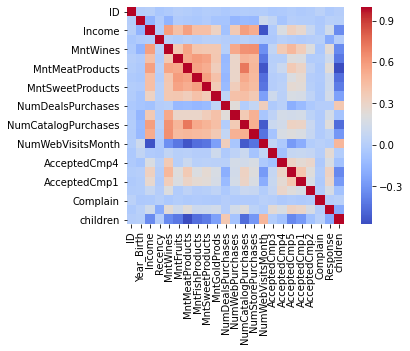

In [16]:
sns.heatmap(corrmat, square=True, cmap='coolwarm')
pass

##### Большинство покупателей имеет детей

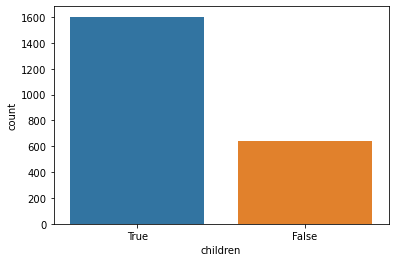

In [17]:
sns.countplot(x='children', order=data['children'].value_counts().index, data=data)
pass

В матрице корреляции в глаза бросается странная связь покупок мяса и покупок с помощью каталога.
На приведенном ниже графике виден выброс, который говорит о том, что существует человек, тратящий много денег на мясо и часто заказывающий что-то из каталога

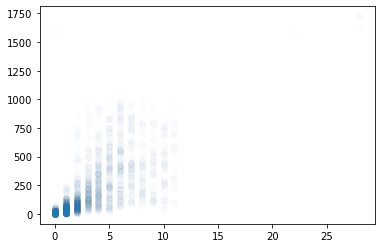

In [18]:
plt.scatter(data['NumCatalogPurchases'], data['MntMeatProducts'], alpha=0.01)
pass

### Исключим выбросы из выборки

In [44]:
rows2drop = data[
    (data['NumCatalogPurchases'] < data['NumCatalogPurchases'].quantile(0.005)) | (data['NumCatalogPurchases'] > data['NumCatalogPurchases'].quantile(0.995)) | 
    (data['MntMeatProducts']  < data['MntMeatProducts' ].quantile(0.005)) | (data['MntMeatProducts']  > data['MntMeatProducts' ].quantile(0.995))].index
data = data.drop(rows2drop)

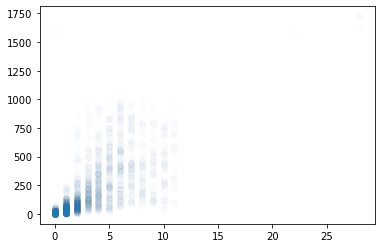

In [78]:
plt.scatter(data['NumCatalogPurchases'], data['MntMeatProducts'], alpha=0.01)
pass

После исключения выборосов видим, что люди, редко заказывающие что-то из каталога, тратят меньше денег на мясо. 
Следовательно, им предлагать мясные продукты не стоит.

### Нормализуем данные

In [19]:
data_numerical = data[numerical_columns]

data_stand = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)
data_stand.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,...,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,-8.108791e-15,-5.357817e-17,-3.305887e-17,-9.015606e-17,-2.032105e-17,3.851086e-17,-1.204394e-17,-3.920475e-17,-2.158492e-17,-3.017923e-16,...,6.319350e-17,-9.992007e-17,4.561827e-16,-2.820660e-16,5.159563e-17,3.119033e-16,-4.401985e-16,-4.291210e-16,3.588399e-16,2.484124e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.325548e+00,-2.017256e+00,-1.695622e+00,-9.029651e-01,-6.613015e-01,-7.396483e-01,-6.869147e-01,-6.555867e-01,-8.438573e-01,-1.203268e+00,...,-1.781068e+00,-2.190892e+00,-2.800777e-01,-2.837668e-01,-2.800777e-01,-2.620527e-01,-1.164843e-01,-9.725995e-02,-4.185187e-01,-1.584251e+00
25%,-8.182365e-01,-6.669564e-01,-8.669630e-01,-8.324061e-01,-6.361591e-01,-6.687626e-01,-6.319987e-01,-6.313622e-01,-6.713359e-01,-6.857335e-01,...,-8.582635e-01,-9.546175e-01,-2.800777e-01,-2.837668e-01,-2.800777e-01,-2.620527e-01,-1.164843e-01,-9.725995e-02,-4.185187e-01,-1.584251e+00
50%,9.964866e-02,-3.420708e-02,-3.776441e-03,-3.875126e-01,-4.601622e-01,-4.428143e-01,-4.672510e-01,-4.617906e-01,-3.838002e-01,-1.681988e-01,...,-2.430602e-01,2.816572e-01,-2.800777e-01,-2.837668e-01,-2.800777e-01,-2.620527e-01,-1.164843e-01,-9.725995e-02,-4.185187e-01,6.309314e-01
75%,6.837574e-01,6.410976e-01,8.594101e-01,5.951154e-01,1.683980e-01,2.881948e-01,2.283505e-01,1.438222e-01,2.296092e-01,3.493359e-01,...,6.797447e-01,6.937488e-01,-2.800777e-01,-2.837668e-01,-2.800777e-01,-2.620527e-01,-1.164843e-01,-9.725995e-02,-4.185187e-01,6.309314e-01
max,2.269195e+00,2.453986e+01,1.722597e+00,3.532601e+00,4.342038e+00,6.902720e+00,4.054159e+00,5.715460e+00,6.095337e+00,6.559753e+00,...,2.217753e+00,6.050940e+00,3.568843e+00,3.522447e+00,3.568843e+00,3.814323e+00,8.581013e+00,1.027713e+01,2.388313e+00,6.309314e-01


In [20]:
type(data_numerical)

pandas.core.frame.DataFrame

In [21]:
k = data['ID'].to_frame()

In [22]:
new_data = pd.concat((data['ID'].to_frame(), data_numerical, data_nonbinary), axis = 1)

### Отбор признаков

In [62]:
X = new_data.drop(['ID','MntMeatProducts'], axis=1)
y = new_data['MntMeatProducts']

In [63]:
y

0       546
1         6
2       127
3        20
4       118
       ... 
2235    182
2236     30
2237    217
2238    214
2239     61
Name: MntMeatProducts, Length: 2240, dtype: int64

In [25]:
X = X.to_numpy()

In [26]:
y = np.array(y[y <= 50], dtype='int')

In [68]:
len(y[y > 50]) / len(y)

0.5491071428571429

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1568 672


### Небольшая подготовка

Заведем переменные, чтобы хранить значения ошибок для каждого метода, чтобы в дальнейшем построить таблицу

In [28]:
methods = []
err_test_arr = []
err_train_arr = []

### Метод k-ближайших соседей

Cоздадим модель для метода к-ближайших соседей и обучим её:

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
methods.append("knn_10")

На обученную модель подаем обучаемую выборку и вычисляем ошибку:

In [30]:
y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

0.12181122448979592


На обученную модель подаем тестовую выборку и вычисляем ошибку:

In [31]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.16815476190476192


Изменим параметр метода k-ближайших соседей:

In [32]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
methods.append("knn_1")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.0
0.15625


In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
methods.append("knn_3")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.07015306122448979
0.1636904761904762


In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
methods.append("knn_5")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.10267857142857142
0.1636904761904762


In [35]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
methods.append("knn_15")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.13839285714285715
0.16666666666666666


In [36]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
methods.append("knn_25")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train!= y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.14221938775510204
0.16517857142857142


In [37]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train, y_train)
methods.append("knn_35")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.14987244897959184
0.16666666666666666


In [38]:
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(X_train, y_train)
methods.append("knn_45")

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.15178571428571427
0.16071428571428573


In [39]:
knn = KNeighborsClassifier(n_neighbors = 55)
knn.fit(X_train, y_train)
methods.append("knn_55")

y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.16198979591836735
0.16666666666666666


### Попробуем MLP классификатор

In [40]:
from sklearn.neural_network import MLPClassifier

Создадим модель и обучим её

In [41]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
methods.append("mlp_1")

In [42]:
y_train_predict = mlp.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = mlp.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.10650510204081633
0.11755952380952381


Поиграем с параметром alpha

In [43]:
mlp = MLPClassifier(alpha=0.8, max_iter=1000)
mlp.fit(X_train, y_train)
methods.append("mlp_0.8")

y_train_predict = mlp.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = mlp.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.08737244897959184
0.09970238095238096


### Попробуем наивный байесовский классификатор GaussianNB

In [44]:
from sklearn.naive_bayes import GaussianNB

Создадим модель и обучим её

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
methods.append("gnb")

In [46]:
y_train_predict = gnb.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = gnb.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.10522959183673469
0.10267857142857142


### Попробуем Случайный лес

In [47]:
from sklearn.ensemble import RandomForestClassifier

Создадим модель и обучим её

In [48]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
methods.append("rf")

In [49]:
y_train_predict = rfc.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train_arr.append(err_train)
print(err_train)

y_test_predict = rfc.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test_arr.append(err_test)
print(err_test)

0.07079081632653061
0.09821428571428571


In [50]:
len(err_train_arr)

13

In [51]:
results = {'classifier': methods, 'err_test': err_test_arr, 'err_train':err_train_arr}
results = pd.DataFrame(results)

Отсортируем таблицу так, чтобы сверху была минимальная ошибка на тестовой выборке

In [53]:
results.sort_values(by=['err_test'])

,classifier,err_test,err_train
12,rf,0.098214,0.070791
10,mlp_0.8,0.099702,0.087372
11,gnb,0.102679,0.105230
9,mlp_1,0.117560,0.106505
1,knn_1,0.156250,0.000000
7,knn_45,0.160714,0.151786
2,knn_3,0.163690,0.070153
3,knn_5,0.163690,0.102679
5,knn_25,0.165179,0.142219
4,knn_15,0.166667,0.138393


Получаем, что лучше всех показали себя классификаторы Случайный лес и Многослойный перцептрон

##### В ходе работы было изучено:
##### 1) Работа с библиотеками для машинного обучения;
##### 2) Методы обработки пропущенных значений 
##### 3) Методы нормализации данных.
##### 4) Использование метода "k-ближаших соседей".
##### 5) Методы разбиения выборки на тестовую и обучающу.

##### Метод k ближайших соседей запускался с параметром k = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
##### С уменьшением параметра на обучающей выборке ошибка уменьшается - поведение стремится к полному перебору значений выборки
##### С увеличением параметра на тестовойй выборке ошибка уменьшается - при рассмотрении большего числа объектов, точность предсказания повышается (до идеального параметра, далее - падает)